In [ ]:
## TODO
## subclass nx.graph and store adj, D, etc as attribute variables
## Grabriel quality

In [1]:
## custom
from utils import utils, vis
from utils import poly_point_isect as bo   ##bentley-ottmann sweep line
import criteria as C
import quality as Q
import gd2


## third party
import networkx as nx

from PIL import Image
from natsort import natsorted


## sys
import random
import time
from glob import glob
import math
from collections import defaultdict
import os
from pathlib import Path
import itertools
import pickle as pkl

## numeric
import numpy as np
import scipy.io as io
import torch
from torch import nn, optim
import torch.nn.functional as F


## vis
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits import mplot3d
from matplotlib import collections  as mc
from mpl_toolkits.mplot3d.art3d import Line3DCollection
from matplotlib.gridspec import GridSpec

## notebook
from IPython import display
from IPython.display import clear_output
from tqdm.notebook import tqdm

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
device = 'cpu'
plt.style.use('ggplot')
plt.style.use('seaborn-colorblind')


## Example matrix

## training

In [20]:
##choose a graph
# G = nx.balanced_tree(2,5)
# graph_str = 'tree_2_5'

G = nx.grid_2d_graph(6,10)
graph_str = 'grid_6_10'

start_date = int(time.time())
dir_out = f'./analysis/criteria_pairs/{graph_str}-t{start_date}'
print(dir_out)
if not Path(dir_out).exists():
    os.makedirs(dir_out)

./analysis/criteria_pairs/grid_6_10-t1635404907


In [33]:
G = nx.balanced_tree(2,5)
graph_str = 'tree_2_5'
dir_out = './analysis/criteria_pairs/tree_2_5-t1635390254'


{'aspect_ratio', 'stress'}



{'stress': 0.0632081734231937, 'ideal_edge_length': 0.0733913779258728, 'neighborhood_preservation': 0.49696969985961914, 'crossings': 0, 'crossing_angle_maximization': 0, 'aspect_ratio': 0.035245299339294434, 'angular_resolution': 0.7138380118284283, 'vertex_resolution': 0.4768891325703791, 'gabriel': 4.172325134277344e-07}


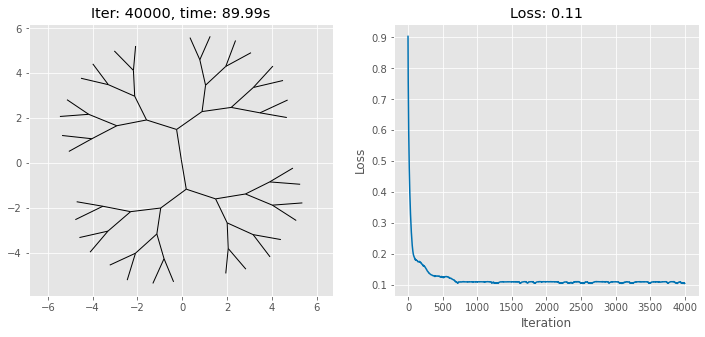

{'ideal_edge_length', 'aspect_ratio'}



{'stress': 0.15911499711320698, 'ideal_edge_length': 0.10613930970430374, 'neighborhood_preservation': 0.772277221083641, 'crossings': 5, 'crossing_angle_maximization': 1.0000000278275352, 'aspect_ratio': 0.09742593765258789, 'angular_resolution': 0.9999853720115276, 'vertex_resolution': 0.9998509702024854, 'gabriel': 0.08577287197113037}


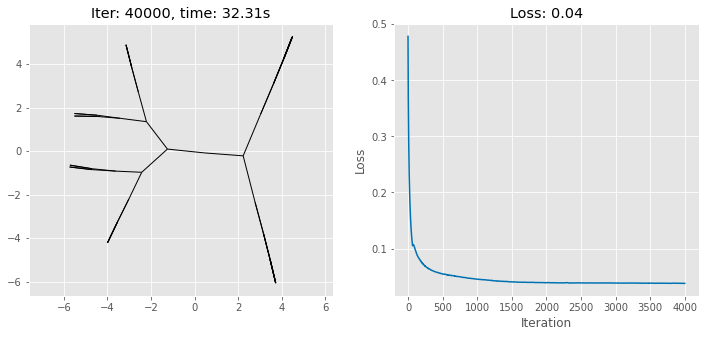

{'aspect_ratio', 'neighborhood_preservation'}



{'stress': 0.1858080399067965, 'ideal_edge_length': 0.7594904899597168, 'neighborhood_preservation': 0.1764705777168274, 'crossings': 2, 'crossing_angle_maximization': 0.2811205686269421, 'aspect_ratio': 0.08405870199203491, 'angular_resolution': 0.9160502587478594, 'vertex_resolution': 0.7649342420383425, 'gabriel': 0.6651305854320526}


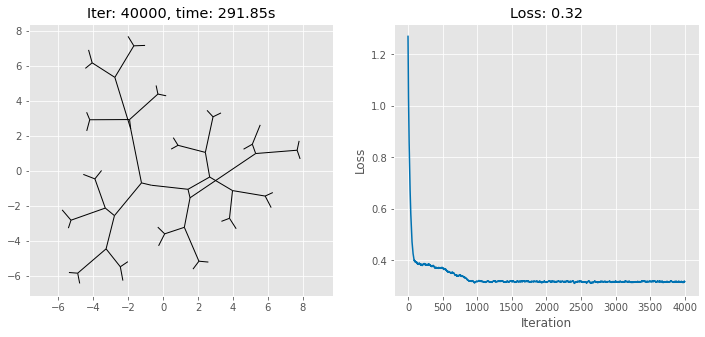

{'aspect_ratio', 'crossings'}



{'stress': 8.279476289507736, 'ideal_edge_length': 29.2535457611084, 'neighborhood_preservation': 0.7537688463926315, 'crossings': 1, 'crossing_angle_maximization': 0.003774286644358268, 'aspect_ratio': 0.2216927409172058, 'angular_resolution': 0.999518414745271, 'vertex_resolution': 0.9981629068065769, 'gabriel': 0.9200734123587608}


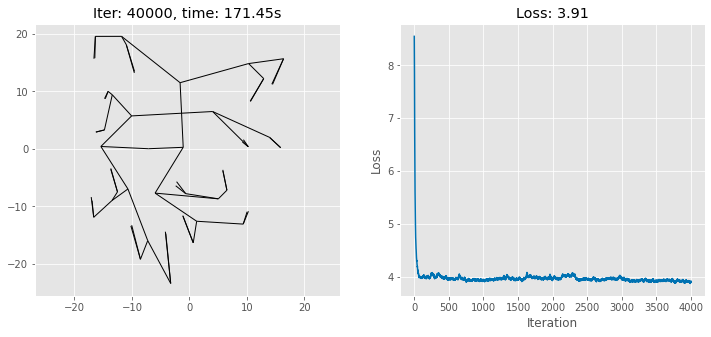

{'crossing_angle_maximization', 'aspect_ratio'}



{'stress': 15.232657932704475, 'ideal_edge_length': 275.6925964355469, 'neighborhood_preservation': 0.9959514169022441, 'crossings': 480, 'crossing_angle_maximization': 0.8867965484147347, 'aspect_ratio': 0.19997823238372803, 'angular_resolution': 0.9998184308045638, 'vertex_resolution': 0.9042064003634074, 'gabriel': 0.9524989500641823}


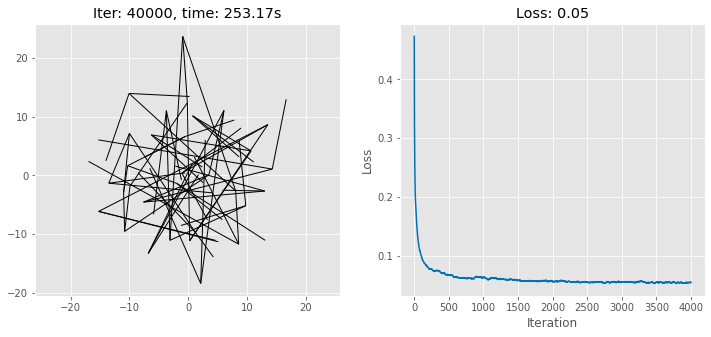

{'aspect_ratio'}



{'stress': 13.237621540501113, 'ideal_edge_length': 229.05384826660156, 'neighborhood_preservation': 0.9918699190020561, 'crossings': 469, 'crossing_angle_maximization': 0.9618477294887057, 'aspect_ratio': 0.2581426501274109, 'angular_resolution': 0.9891397359728055, 'vertex_resolution': 0.9853816253288336, 'gabriel': 0.9841242451220751}


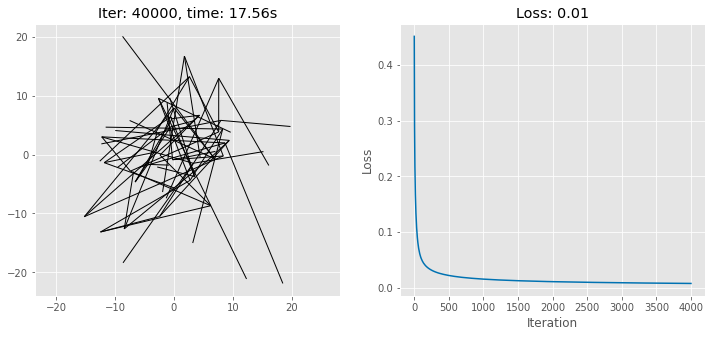

{'aspect_ratio', 'angular_resolution'}



{'stress': 7.91299737465509, 'ideal_edge_length': 87.50213623046875, 'neighborhood_preservation': 0.8928571417927742, 'crossings': 79, 'crossing_angle_maximization': 0.928088684715019, 'aspect_ratio': 0.23698759078979492, 'angular_resolution': 0.4571682872015317, 'vertex_resolution': 0.9776812629841687, 'gabriel': 0.9554331824183464}


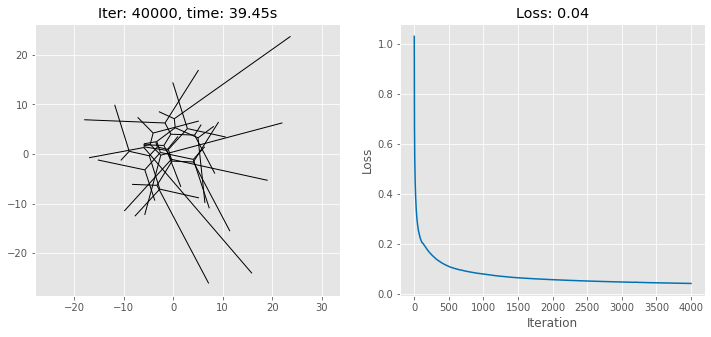

{'vertex_resolution', 'aspect_ratio'}



{'stress': 16.061548229624748, 'ideal_edge_length': 295.9199523925781, 'neighborhood_preservation': 0.9836065582931042, 'crossings': 497, 'crossing_angle_maximization': 0.9864270000178951, 'aspect_ratio': 0.06872713565826416, 'angular_resolution': 0.9925923183356626, 'vertex_resolution': 0.19788309873474186, 'gabriel': 0.9877926949411631}


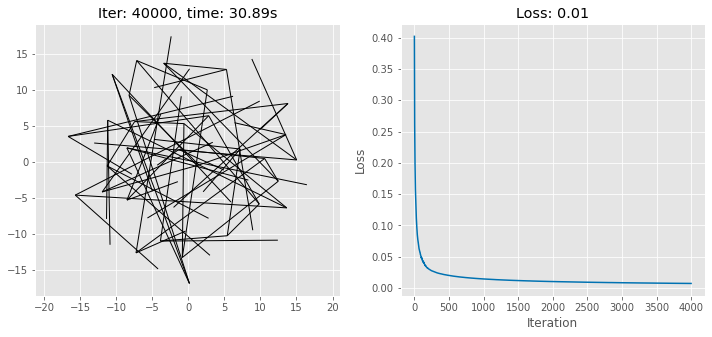

{'gabriel', 'aspect_ratio'}



{'stress': 5.7871818268848925, 'ideal_edge_length': 62.779747009277344, 'neighborhood_preservation': 0.9794238675385714, 'crossings': 148, 'crossing_angle_maximization': 0.9955439365220281, 'aspect_ratio': 0.18464893102645874, 'angular_resolution': 0.9995802848755028, 'vertex_resolution': 0.9982804388905155, 'gabriel': 0.30492353439331055}


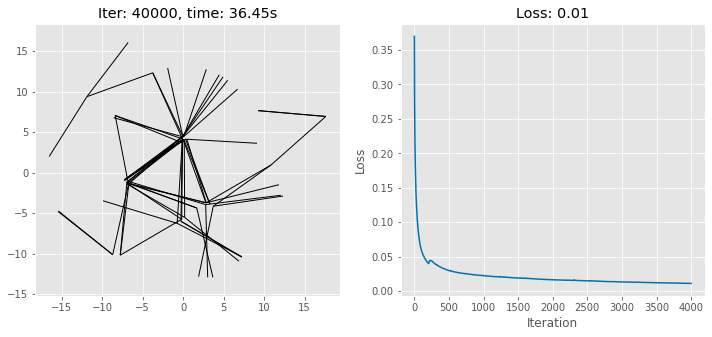


CPU times: user 33min 20s, sys: 9.46 s, total: 33min 30s
Wall time: 16min 54s


In [34]:
%%time


import importlib
importlib.reload(C)
importlib.reload(Q)
importlib.reload(utils)
importlib.reload(vis)
import gd2
importlib.reload(gd2)
from gd2 import GD2




criteria_weights = dict(
    stress=1,
    ideal_edge_length=0.05,
    neighborhood_preservation=0.5,
    crossings=0.2,
    crossing_angle_maximization=0.1,
    aspect_ratio=3,
    angular_resolution=1,
    vertex_resolution=1,
    gabriel=0.1,
)

sample_sizes = dict(
    stress=128,
    ideal_edge_length=32,
    neighborhood_preservation=16,
    crossings=128,
    crossing_angle_maximization=16,
    aspect_ratio=max(128, int(len(G)**0.5)),
    angular_resolution=128,
    vertex_resolution=int(len(G)**0.5),
    gabriel=64,
)



## choose criteria
criteria_all = [
    'stress',
    'ideal_edge_length',
    'neighborhood_preservation',
    'crossings',
    'crossing_angle_maximization',
    'aspect_ratio',
    'angular_resolution',
    'vertex_resolution',
    'gabriel',
]

criteria_pairs = [
    (ci, cj) for (i,ci), (j, cj) 
    in list(
        itertools.product(
            enumerate(criteria_all), 
            enumerate(criteria_all)
        ))
#     if i<=j
    if i<=j and 'aspect_ratio' in (ci,cj)
]



for ci, cj in tqdm(criteria_pairs):
    criteria_pair = {ci, cj}
    print(criteria_pair)

    gd = GD2(G)

    result = gd.optimize(
        criteria_weights={c:criteria_weights[c] for c in criteria_pair}, 
        sample_sizes=sample_sizes,
        evaluate=criteria_all,

        max_iter=40000, 
        evaluate_interval=40000//40,
        vis_interval=-40000//10,
#             clear_output=True,
        criteria_kwargs = dict(
            aspect_ratio=dict(target=[1,1]),
        ),
#         optimizer_kwargs = dict(mode='Adam', lr=0.005),
        optimizer_kwargs = dict(mode='SGD', lr=2),
        scheduler_kwargs = dict(verbose=False),
    )
    print(result['qualities'])

    pos = gd.pos.detach().numpy()
    pos_G = {k:pos[gd.k2i[k]] for k in gd.G.nodes}
    vis.plot(
        gd.G, pos_G,
        gd.loss_curve, 
        result['iter'], result['runtime'],
        edge=True, show=True, save=False
    )



    ## store data
    if ci == cj:
        fn = ci
    else:
        fn = f'{ci}-vs-{cj}'
    gd.save(f'{dir_out}/{fn}.pkl')




## plot examples in a matrix

In [2]:
import importlib
importlib.reload(C)
importlib.reload(Q)
importlib.reload(utils)
importlib.reload(vis)
import gd2
importlib.reload(gd2)
from gd2 import GD2

In [67]:
def show_text(ax, text):
    plt.text(0, 0, f'{text}', fontsize='x-large', ha='center', va='center')
    ax.set_facecolor('white')
    plt.xlim([-1,1])
    plt.ylim([-1,1])
    plt.xticks([])
    plt.yticks([])
            

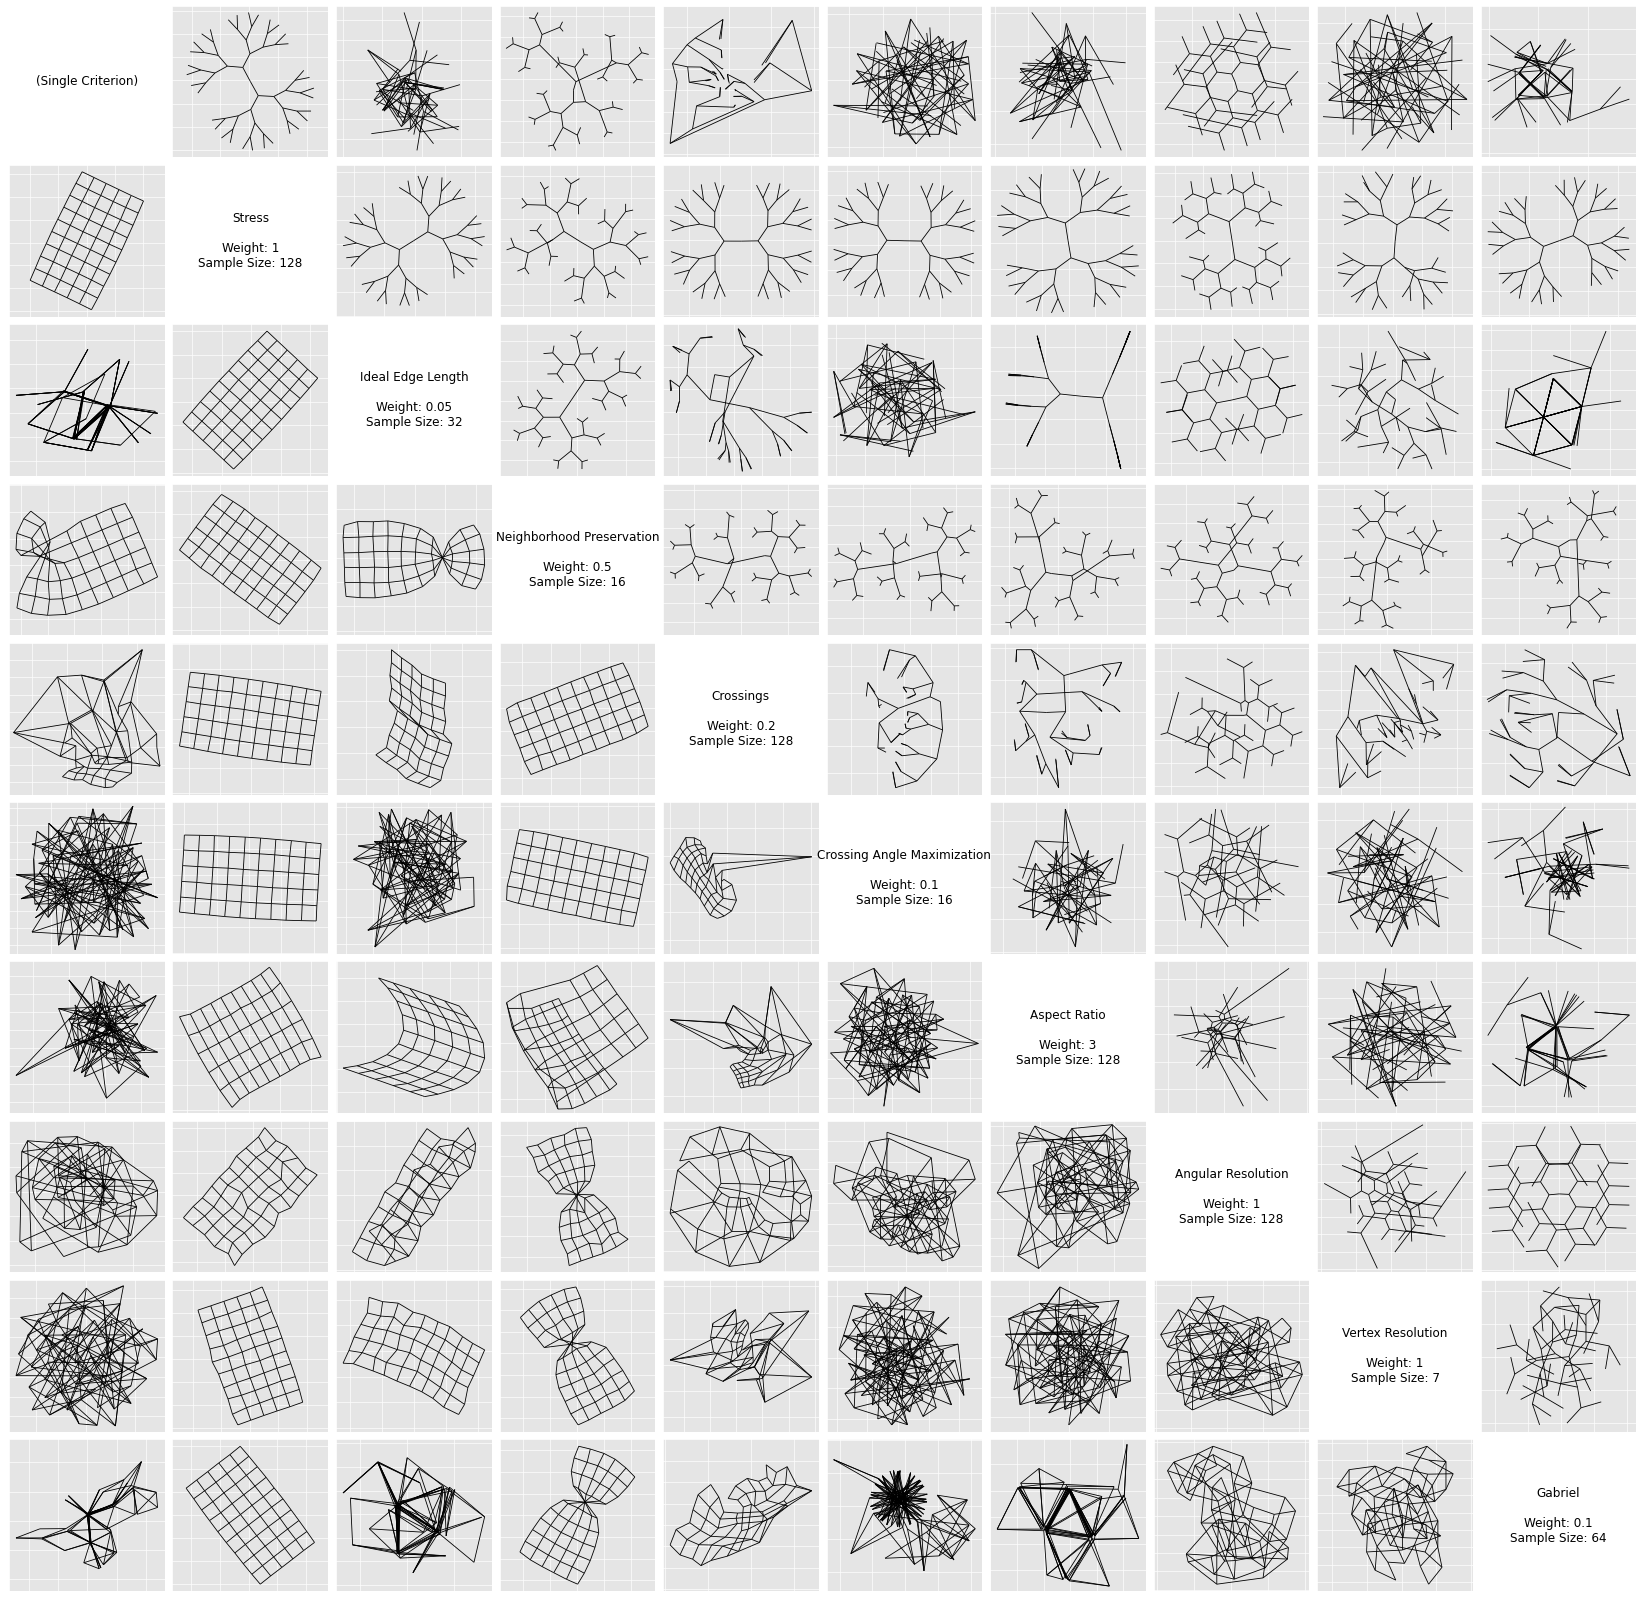

In [74]:
# dir_upper = './analysis/criteria_pairs/tree_2_5-t1633999851'
# dir_upper = './analysis/criteria_pairs/tree_2_5-t1634777911'
dir_upper = './analysis/criteria_pairs/tree_2_5-t1635390254'



# dir_lower = './analysis/criteria_pairs/grid_6_10-t1634797039'
# dir_lower = './analcysis/criteria_pairs/grid_6_10-t1634831625'
dir_lower = './analysis/criteria_pairs/grid_6_10-t1635404907'


criteria_all = [
    '',
    'stress',
    'ideal_edge_length',
    'neighborhood_preservation',
    'crossings',
    'crossing_angle_maximization',
    'aspect_ratio',
    'angular_resolution',
    'vertex_resolution',
    'gabriel',
]
n = len(criteria_all)
criteria_pairs = list(itertools.product(enumerate(criteria_all), enumerate(criteria_all)))


mode = 'drawings'
# mode = 'criteria_pairs'
# mode = 'learning_curves'


if mode == 'drawings':
    space = 0.05
    figsize = [35,35]
elif mode == 'learning_curves':
    space = 0.3
    figsize = [55,55]
elif mode == 'criteria_pairs':
    space = 0.3
    figsize = [45,45]
    
fig = plt.figure(figsize=figsize, dpi=60)
gs = GridSpec(n,n, wspace=space, hspace=space)

for (i,ci), (j,cj) in tqdm(criteria_pairs):
    
        if i == j:
#             fn = f'{dir_upper}/{ci}.pkl'
            ax = plt.subplot(gs[i,j])
            if ci == '':
                show_text(ax, f'(Single Criterion)')
            else:
                show_text(
                    ax, 
                    f'{utils.criterion_to_title(ci)}\n'
                    f'\n'
                    f'Weight: {criteria_weights[ci]}\n'
                    f'Sample Size: {sample_sizes[ci]}'
                )
            continue

        elif i<j:
            fn = f'{dir_upper}/{ci}-vs-{cj}.pkl'
            fn_1 = f'{dir_upper}/{ci}.pkl'
            fn_2 = f'{dir_upper}/{cj}.pkl'
            if ci=='':
                fn = fn_1 = fn_2 = f'{dir_upper}/{cj}.pkl'
            elif cj=='':
                fn = fn_1 = fn_2 = f'{dir_upper}/{ci}.pkl'
            
        elif i>j:
            fn = f'{dir_lower}/{cj}-vs-{ci}.pkl'
            fn_1 = f'{dir_lower}/{ci}.pkl'
            fn_2 = f'{dir_lower}/{cj}.pkl'
            if ci=='':
                fn = fn_1 = fn_2 = f'{dir_lower}/{cj}.pkl'
            elif cj=='':
                fn = fn_1 = fn_2 = f'{dir_lower}/{ci}.pkl'
            
    
        with open(fn, 'rb') as f, open(fn_1, 'rb') as f1, open(fn_2, 'rb') as f2:
            
            data = pkl.load(f)
            data1 = pkl.load(f1)
            data2 = pkl.load(f2)
#             print(data['pos'].min(), data['pos'].max())
            
            
            ax = plt.subplot(gs[i,j])
            
            if mode == 'drawings':
                ## draw graphs
                pos = data['pos'].detach().numpy()
                pos_G = {k:pos[data['k2i'][k]] for k in data['G'].nodes}
                vis.draw_graph(
                    data['G'], pos_G, ax=ax,
#                     ylabel=ci,# if j==0 else '',
#                     xlabel=cj,# if i==0 else '',
                )
                ax.xaxis.set_label_position('top')
                plt.axis('equal')
                ax.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
                
                

                
            
            elif mode == 'criteria_pairs':
                if ci == cj == '':
                    continue
                elif ci == '' and cj != '':
                    ci = cj
                elif cj == '' and ci != '':
                    cj = ci
                
                ## plot learn curves
                t = [r['time'] for r in data['qualities_by_time']]
                quality_curve_x = [r['qualities'][cj] for r in data['qualities_by_time']]
                quality_curve_y = [r['qualities'][ci] for r in data['qualities_by_time']]
                plt.scatter(quality_curve_x, quality_curve_y, s=50, c=t)
                plt.plot(quality_curve_x, quality_curve_y, c='#777', zorder=-1)
                plt.xlabel(cj)
                plt.ylabel(ci)
                
                
            elif mode == 'learning_curves':
                ## plot quality curves       
                t = [r['time'] for r in data['qualities_by_time']]
                
                ## learning curve of single criterion
                if ci == '' or cj == '':
                    c = max(ci, cj)
                    quality_curve = np.array([r['qualities'][c] for r in data['qualities_by_time']])
                    if c in {'stress', 'crossings', 'ideal_edge_length'}:
                        quality_curve = quality_curve/quality_curve.max()
                            
                    plt.plot(
                        t, quality_curve, 
                        '--', 
                        label=f'{utils.criterion_to_title(c)} - single',
                        lw=2.0,
                        color='C0' if i>j else 'C1',
                    )
                    
                ## learning curves of a pair of criteria, vs lower bound of learning each criterion
                if ci != '' and cj != '':
                    for c, data_single in [(ci,data1),(cj,data2)]:
                    
                        quality_curve = np.array([r['qualities'][c] for r in data['qualities_by_time']])
                        t1 = [r['time'] for r in data_single['qualities_by_time']]
                        quality_curve_1 = np.array([r['qualities'][c] for r in data_single['qualities_by_time']])

                        if c==ci:
                            color = 'C0'
                        elif c==cj:
                            color = 'C1'               
                        if c in {'stress', 'crossings', 'ideal_edge_length'}:
                            quality_curve = quality_curve/max(quality_curve_1.max(),quality_curve.max())
                            quality_curve_1 = quality_curve_1/max(quality_curve_1.max(),quality_curve.max())
                        ## quality curve when optimizing PAIRS
                        plt.plot(
                            t, quality_curve, 
                            '-', 
                            label=f'{utils.criterion_to_title(c)} - paired',
                            lw=2.0,
                            color=color,
                        )
                        ## quality curve/lower bound when optimizing SINGLES
                        plt.plot(
                            [0,t[-1]], [quality_curve_1.min(), quality_curve_1.min()], 
    #                         t1+[max(t[-1], t1[-1]),], quality_curve_1.tolist()+[quality_curve_1[-1],],
                            '--', 
                            label=f'{utils.criterion_to_title(c)} - single',
                            lw=1.5,
                            color=color,
                        )
                    
                plt.xlabel('Time (sec)')
                plt.ylabel('Quality')
#                 plt.title(f'{ci} vs. {cj}')
                plt.legend()
                plt.ylim([-0.1, 2.0])

plt.savefig(f'{mode}-matrix.pdf', bbox_inches='tight', dpi=120)
plt.show()
            


In [54]:
fn

'./analysis/criteria_pairs/tree_2_5-t1635390254/-vs-stress.pkl'

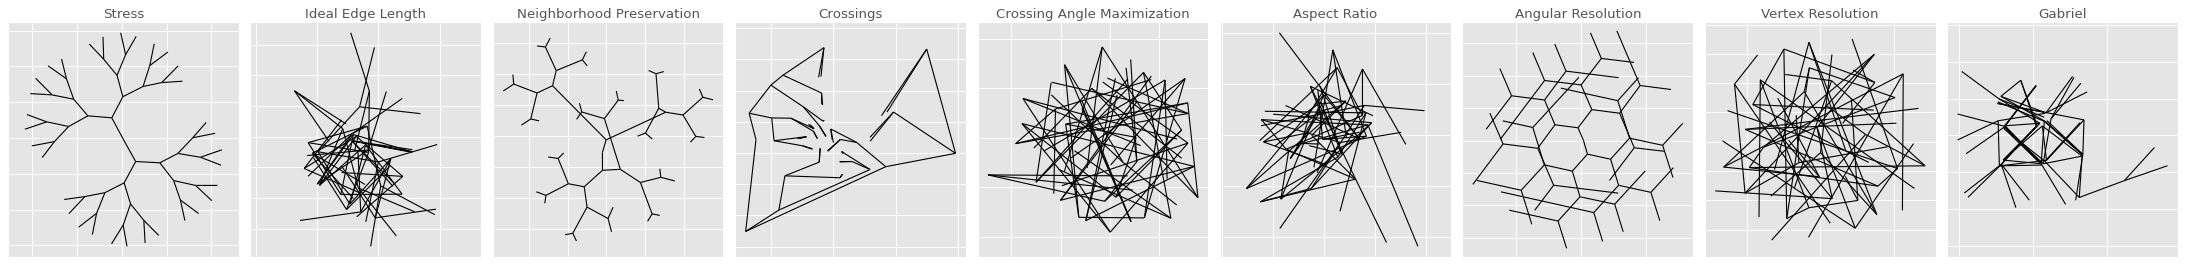

In [51]:
# ## draw singletons in a separate plot

# # dir_in = './analysis/criteria_pairs/tree_2_5-t1633999851'
# # dir_in = './analysis/criteria_pairs/tree_2_5-t1634777911'
# dir_in = dir_upper
# # dir_in = dir_lower

# graph_str = dir_in.split('/')[-1].split('-t')[0]

# # dir_in = './analysis/criteria_pairs/grid_6_10-t1634190792'

# criteria_all = [
#     'stress',
#     'ideal_edge_length',
#     'neighborhood_preservation',
#     'crossings',
#     'crossing_angle_maximization',
#     'aspect_ratio',
#     'angular_resolution',
#     'vertex_resolution',
#     'gabriel',
# ]
# n = len(criteria_all)


# mode = 'drawings'
# # mode = 'learning_curves'


# if mode == 'drawings':
#     space = 0.05
#     figsize = [35,35/n]
# else:
#     space = 0.3
#     figsize = [40,40/n]
    
# fig = plt.figure(figsize=figsize, dpi=80)
# gs = GridSpec(1,n, wspace=space, hspace=space)

# for i,c in enumerate(criteria_all):
#     fn = f'{dir_in}/{c}.pkl'
#     with open(fn, 'rb') as f:
#         data = pkl.load(f)

#         ax = plt.subplot(gs[0,i])

#         if mode == 'drawings':
#             ## draw graphs
#             pos = data['pos'].detach().numpy()
#             pos_G = {k:pos[data['k2i'][k]] for k in data['G'].nodes}
#             vis.draw_graph(
#                 data['G'], pos_G, ax=ax,
#                 xlabel=utils.criterion_to_title(c)
#             )
#             ax.xaxis.set_label_position('top')
#             plt.axis('equal')
#             ax.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)

#         elif mode == 'learning_curves':
#             ## plot quality curves       
#             t = [r['time'] for r in data['qualities_by_time']]
#             quality_curve = np.array([r['qualities'][c] for r in data['qualities_by_time']])

#             color = 'C0'
#             if c in {'stress', 'crossings', 'ideal_edge_length'}:
#                 quality_curve = quality_curve/quality_curve.max()
                
#             plt.plot(
#                 t, quality_curve, 
#                 '-', 
#                 label=f'{utils.criterion_to_title(c)}',
#                 lw=2.0,
#                 color=color,
#             )

#             plt.xlabel('Time (sec)')
#             plt.ylabel('Quality')
            
#             plt.title(f'{utils.criterion_to_title(c)}')
# #             plt.legend()

#             plt.ylim([-0.1, 1.1])
        
# plt.savefig(f'{graph_str}-{mode}-plot.pdf', bbox_inches='tight', dpi=120)


## testing reyans hyper cubes

In [ ]:
import json
log_dir = 'reyan/log_folder/'
problematic_files = ['input_11.txt', 'input_18.txt', 'input_26.txt', 'input_27.txt', 'input_28.txt', 'input_48.txt', 'input_56.txt', 'input_63.txt', 'input_70.txt', 'input_71.txt', 'input_73.txt', 'input_74.txt', 'input_75.txt', 'input_76.txt', 'input_93.txt', 'input_94.txt', 'input_95.txt', 'input_101.txt', 'input_102.txt', 'input_103.txt', 'input_108.txt', 'input_109.txt', 'input_110.txt', 'input_115.txt', 'input_116.txt', 'input_117.txt', 'input_118.txt', 'input_120.txt', 'input_121.txt', 'input_122.txt', 'input_123.txt', 'input_124.txt', 'input_125.txt', 'input_126.txt', 'input_127.txt', 'input_128.txt', 'input_129.txt', 'input_134.txt', 'input_137.txt', 'input_138.txt', 'input_139.txt', 'input_140.txt', 'input_146.txt', 'input_147.txt', 'input_148.txt', 'input_153.txt', 'input_154.txt', 'input_155.txt', 'input_157.txt', 'input_160.txt', 'input_161.txt', 'input_162.txt', 'input_163.txt', 'input_164.txt', 'input_166.txt', 'input_167.txt', 'input_168.txt', 'input_169.txt', 'input_170.txt', 'input_171.txt', 'input_172.txt', 'input_173.txt', 'input_174.txt', 'input_179.txt', 'input_183.txt', 'input_184.txt', 'input_185.txt', 'input_191.txt', 'input_192.txt', 'input_193.txt', 'input_198.txt', 'input_199.txt', 'input_200.txt', 'input_202.txt', 'input_205.txt', 'input_206.txt', 'input_208.txt', 'input_209.txt', 'input_211.txt', 'input_212.txt', 'input_213.txt', 'input_214.txt', 'input_215.txt', 'input_216.txt', 'input_217.txt', 'input_218.txt', 'input_219.txt', 'input_224.txt']
pairs = []
for fn in problematic_files:
    with open(log_dir+fn) as f:
        params = json.load(f)
        graph_str = f'{params["graph"]} {params["graph_param_1"]}'
        pairs.append(
            (tuple(sorted(params['metrics'])),)
            +(graph_str,fn.split('/')[-1].split('.')[0])
        )
        
# for criteria, graph, fn in natsorted(pairs, key=lambda x:x[-1]):
for criteria, graph, fn in natsorted(pairs, key=lambda x:x):
    print(f'{graph}\t{fn:<12} {criteria} ')

In [ ]:
from pathlib import Path

In [ ]:
log_dir = 'log_folder/'
problematic_files = ['input_11.txt', 'input_18.txt', 'input_26.txt', 'input_27.txt', 'input_28.txt', 'input_48.txt', 'input_56.txt', 'input_63.txt', 'input_70.txt', 'input_71.txt', 'input_73.txt', 'input_74.txt', 'input_75.txt', 'input_76.txt', 'input_93.txt', 'input_94.txt', 'input_95.txt', 'input_101.txt', 'input_102.txt', 'input_103.txt', 'input_108.txt', 'input_109.txt', 'input_110.txt', 'input_115.txt', 'input_116.txt', 'input_117.txt', 'input_118.txt', 'input_120.txt', 'input_121.txt', 'input_122.txt', 'input_123.txt', 'input_124.txt', 'input_125.txt', 'input_126.txt', 'input_127.txt', 'input_128.txt', 'input_129.txt', 'input_134.txt', 'input_137.txt', 'input_138.txt', 'input_139.txt', 'input_140.txt', 'input_146.txt', 'input_147.txt', 'input_148.txt', 'input_153.txt', 'input_154.txt', 'input_155.txt', 'input_157.txt', 'input_160.txt', 'input_161.txt', 'input_162.txt', 'input_163.txt', 'input_164.txt', 'input_166.txt', 'input_167.txt', 'input_168.txt', 'input_169.txt', 'input_170.txt', 'input_171.txt', 'input_172.txt', 'input_173.txt', 'input_174.txt', 'input_179.txt', 'input_183.txt', 'input_184.txt', 'input_185.txt', 'input_191.txt', 'input_192.txt', 'input_193.txt', 'input_198.txt', 'input_199.txt', 'input_200.txt', 'input_202.txt', 'input_205.txt', 'input_206.txt', 'input_208.txt', 'input_209.txt', 'input_211.txt', 'input_212.txt', 'input_213.txt', 'input_214.txt', 'input_215.txt', 'input_216.txt', 'input_217.txt', 'input_218.txt', 'input_219.txt', 'input_224.txt']

for fn in problematic_files:
        
    with open(log_dir+fn) as json_file:
        input_param = json.load(json_file)
    
    graph_str = (
        input_param['graph']
        + ' ' 
        + ' '.join(input_param[k] for k in natsorted(input_param) if k.startswith('graph_param_'))
    )
    metrics = input_param['metrics']
    print(f'='*40)
    print(f'fn: {fn}')
    print(f'metrics: {metrics}')
    print(f'graph: {graph_str}')
    
    if Path(input_param["output_file"]).exists():
        continue
          
    print('generating graph', end=' ')
    if input_param["graph"]=="tree":
        G = nx.balanced_tree(int(input_param["graph_param_1"]), int(input_param["graph_param_2"]))
    elif input_param["graph"]=="hypercube":
        G = nx.hypercube_graph(int(input_param["graph_param_1"]))
    elif input_param["graph"]=="grid":
        dim = int(input_param["graph_param_1"])
        G = nx.grid_graph(dim = [dim, dim])
    print(f'of {len(G)} nodes')
    
    max_iter = 10000
    criteria_weights_default = {
        'stress': 4,
        'ideal_edge_length':1,
        'neighborhood_preservation':0.5,
        'crossings':1,
        'crossing_angle_maximization':0.1,
        'aspect_ratio':10,
        'angular_resolution':0.1,
        'vertex_resolution':1,
        'gabriel':0.01,
    }

    sample_sizes_default = {
        'stress': 64,
        'ideal_edge_length': 10,
        'neighborhood_preservation': 16,
        'crossings': 10,
        'crossing_angle_maximization':10,
        'aspect_ratio': 'full',
        'angular_resolution': 10,
        'vertex_resolution': int(len(G)**0.5),
        'gabriel': 10,
    }


    criteria_weights = {}
    for m in input_param['metrics']:
        criteria_weights[m] = criteria_weights_default[m]


    gd = GD2(G)
    result = gd.optimize(
        criteria_weights=criteria_weights,
        sample_sizes=sample_sizes_default,

        evaluate='all',
    #     evaluate={'neighborhood_preservation'},
#         evaluate=set(input_param['metrics']),

        max_iter=max_iter, 
        evaluate_interval=-1,
        vis_interval=-1,

        optimizer_kwargs = dict(lr=1),
        scheduler_kwargs = dict(verbose=False),
    )


    for q,v in result['qualities'].items():
        print(q,v)

    return_dict = dict(
        metric_value=result['qualities'],
        pos=result['pos'].detach().cpu().tolist(),
        time=result['runtime']
    )
    
    with open(input_param["output_file"], 'w') as fp:
        json.dump(return_dict, fp)
          
          
    ## vis for debugging
    pos = gd.pos.detach().numpy()
    pos_G = {k:pos[gd.k2i[k]] for k in gd.G.nodes}
    vis.plot(
        gd.G, pos_G,
        gd.loss_curve, 
        result['iter'], result['runtime'],
        edge=True, show=True, save=False
    )

    

## Animation

In [ ]:
# from matplotlib.animation import FuncAnimation
# from IPython.display import HTML

# if type(xPath) == list:
#     xPath = np.stack(xPath)
    
# padding = 0.1

# fig, ax = plt.subplots()
# scatter = plt.scatter([0], [0], s=10)
# lc = mc.LineCollection([], linewidths=1)
# ax.add_collection(lc)

# xlim = [np.min(xPath[:,:,0]),np.max(xPath[:,:,0])]
# ylim = [np.min(xPath[:,:,1]),np.max(xPath[:,:,1])]
# xlim = [xlim[0]-padding*(xlim[1]-xlim[0]), xlim[1]+padding*(xlim[1]-xlim[0])]
# ylim = [ylim[0]-padding*(ylim[1]-ylim[0]), ylim[1]+padding*(ylim[1]-ylim[0])]
# ax.set_xlim(xlim)
# ax.set_ylim(ylim)
    
# def init():
#     return scatter,lc

# def update(frame):
#     xy = xPath[frame]
#     scatter.set_offsets(xy)
#     segs = [[xy[k2i[k0]], xy[k2i[k1]]] for k0,k1 in G.edges]           
#     lc.set_segments(segs)
#     return scatter,lc

# anim = FuncAnimation(
#     fig, 
#     update, 
#     frames=range(0,len(xPath),1),
#     init_func=init, 
#     interval=1000.0/20,
#     blit=True)

# HTML(anim.to_jshtml())

In [ ]:
# x = pos.detach().cpu().numpy()
# pos_i = {k: x[k2i[k], :2] for k in G.nodes}
# vis.plot(G, pos_i, lossHistory, [], i, totalTime, show=True, save=True)

## animation

In [ ]:
# # Create a gif from images in fig/
# # 
# frames = []
# imgs = natsorted(glob('fig/*.png'))

# for img in imgs:
#     new_frame = Image.open(img)
#     frames.append(new_frame)

# # Save into a GIF file that loops forever
# frames[0].save(f'anim-{int(time.time())}.gif', format='GIF',
#                append_images=frames[1:],
#                save_all=True,
#                duration=100, loop=0)